# 02 - Elbow

---

This exercise is another exemple of application of the K-means. Then it will be less guided, you will have to do it almost all by yourself.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

![](https://lateralepicondylitis.com/wp-content/uploads/2018/04/kate-trysh-167890-unsplash.jpg)

---

**Q1**. Load the dataset `elbow.csv`, inspect and visualize the data. Then create a KMeans object using scikit learn, fit the data, and visualize the result for a given K value.

In [4]:
# load elbow.csv
## load the labels in a df
df = pd.read_csv("elbow.csv")
df.head()
print(df.shape)

(788, 2)


In [5]:
# TODO: inspect and plot the data
print(f'missing values: {df.isna().value_counts()}')

missing values: x      y    
False  False    788
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       788 non-null    float64
 1   y       788 non-null    float64
dtypes: float64(2)
memory usage: 12.4 KB


In [7]:
# convert to np.array()
X = np.array(df)
X

array([[15.55, 28.65],
       [14.9 , 27.55],
       [14.45, 28.35],
       ...,
       [ 8.5 ,  3.25],
       [ 8.1 ,  3.55],
       [ 8.15,  4.  ]])

In [8]:
# TODO: Train a K-means algorithm
# instantiate a K-means object
kmeans =  KMeans(n_clusters=3, random_state=42)
# Fit on the data
kmeans.fit(X)
# show the labels
kmeans.labels_

/home/michaelfaivre/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

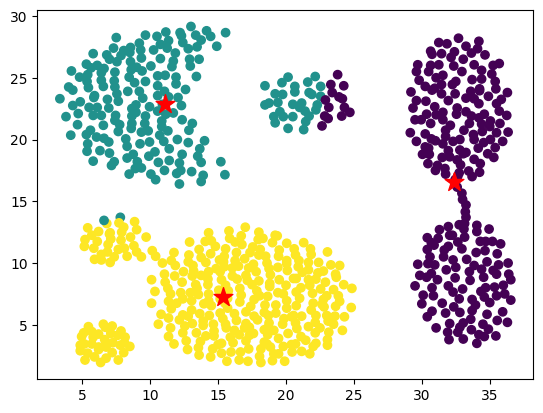

In [9]:
# TODO: Train a K-means algorithm
# display the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

# display the clusters centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="*", s=200, c='red')
plt.show()

**Q2.** Then we will want to get apply the elbow method to choose the number K wisely. To do that, redo the K-means with values of K ranging from 1 to 10 and plot the loss (in *KMeans.inertia_*) as a function of K.

In [10]:
# TODO: apply the K-means algorithm for K ranging from 1 to 10 and store the cost value in an array
def kmeans_nb_clusters(nb_clusters):
    kmeans =  KMeans(n_clusters=nb_clusters, random_state=42)
    # Fit on the data
    kmeans.fit(X)
    return kmeans.inertia_

In [11]:
inertias = {}
for k_clusters in range(1,10):
    # store kmeans.inertia_
    inertias[k_clusters] = kmeans_nb_clusters(k_clusters)

/home/michaelfaivre/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/michaelfaivre/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/michaelfaivre/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/michaelfaivre/.pyenv/versions/3.10.12

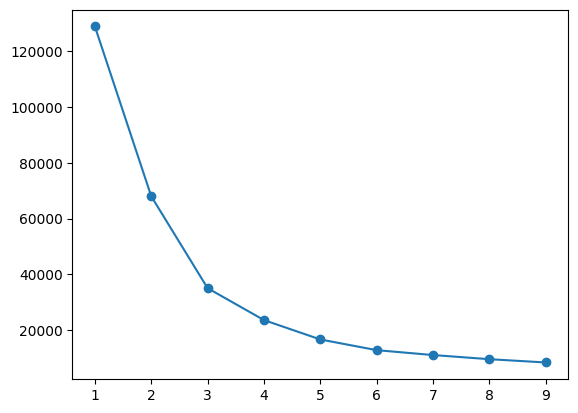

In [13]:
# TODO: plot the values of cost as a function K
plt.plot(range(1,10), inertias.values(), marker='o')
plt.show()
# pas d'elbow très net


**Q3.** What value of K would you choose? Choose the best value according to you and display the cluster result!

In [24]:
# TODO: Choose optimal K
# K = 6
kmeans =  KMeans(n_clusters=6, algorithm='elkan', random_state=42)
# Fit on the data
kmeans.fit(X)

/home/michaelfaivre/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(algorithm='elkan', n_clusters=6, random_state=42)

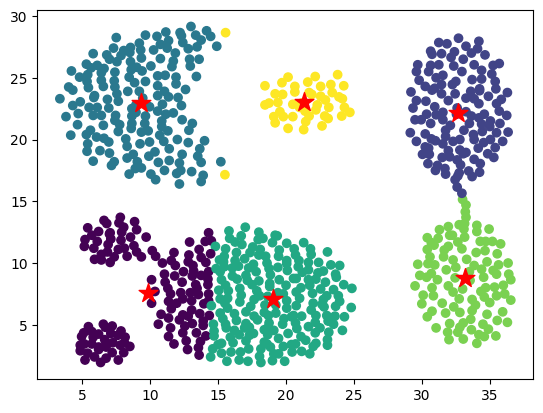

In [25]:
# display the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

# display the clusters centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="*", s=200, c='red')
plt.show()

Feel free to iterate and change the optimal K after visualization!